# Fitting Thomson Scattering Spectrum

See Spectra_fitting_README.md for details

In [1]:
%matplotlib inline
import ts_analysis3 as TsA

# s0611_15

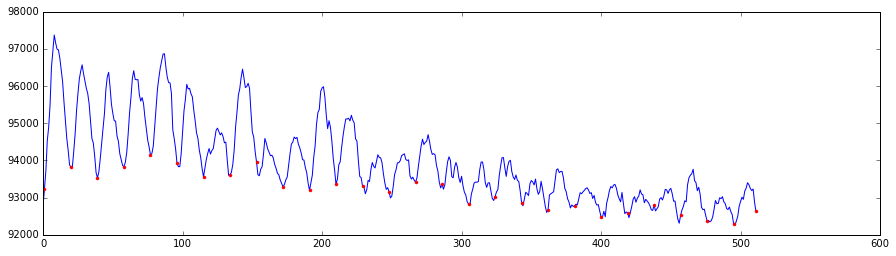

In [6]:
folder='sample_data'
ts=TsA.TS_Analysis(folder,'s0611_15 shot.asc',['s0611_15 full power.asc'])
ts.find_fibre_edges()

In [7]:
'''Split image into fibres'''
ts.split_into_fibres(discard_rows=3)
ts.zero_fibres(upper=1150, lower=850)
a_angle=[45]*14 #here we have fibres 1A through 14A at an angle of 45'
b_angle=[135]*13#and here we have fibres 1B through 13B at an angle of 135'
ts.pair_fibres(a_angle,b_angle)

[[Model]]
    Model(Skw_nLTE_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 14007
    # data points      = 264
    # variables        = 6
    chi-square         = 327707.532
    reduced chi-square = 1270.184
[[Variables]]
    amp:      63.9527224 +/- 43.30384 (67.71%) (init= 1000)
    V_fi:    -41133.9598 +/- 1.26e+04 (30.53%) (init= 0)
    stry:     1144.65629 +/- 27.82939 (2.43%) (init= 100)
    T_e:      272.830486 +/- 282.7957 (103.65%) (init= 100)
    T_i:      12.9450099 +/- 25.97169 (200.63%) (init= 100)
    offset:   2.55994407 +/- 41.25399 (1611.52%) (init= 120)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, offset)               = -0.949 
    C(V_fi, stry)                = -0.697 
    C(T_e, T_i)                  =  0.666 
    C(T_e, offset)               = -0.661 
    C(stry, T_i)                 = -0.609 
    C(V_fi, T_i)                 =  0.540 
    C(amp, T_e)                  =  0.411 
    C(V_fi, T_e)                 =  0.353 
   

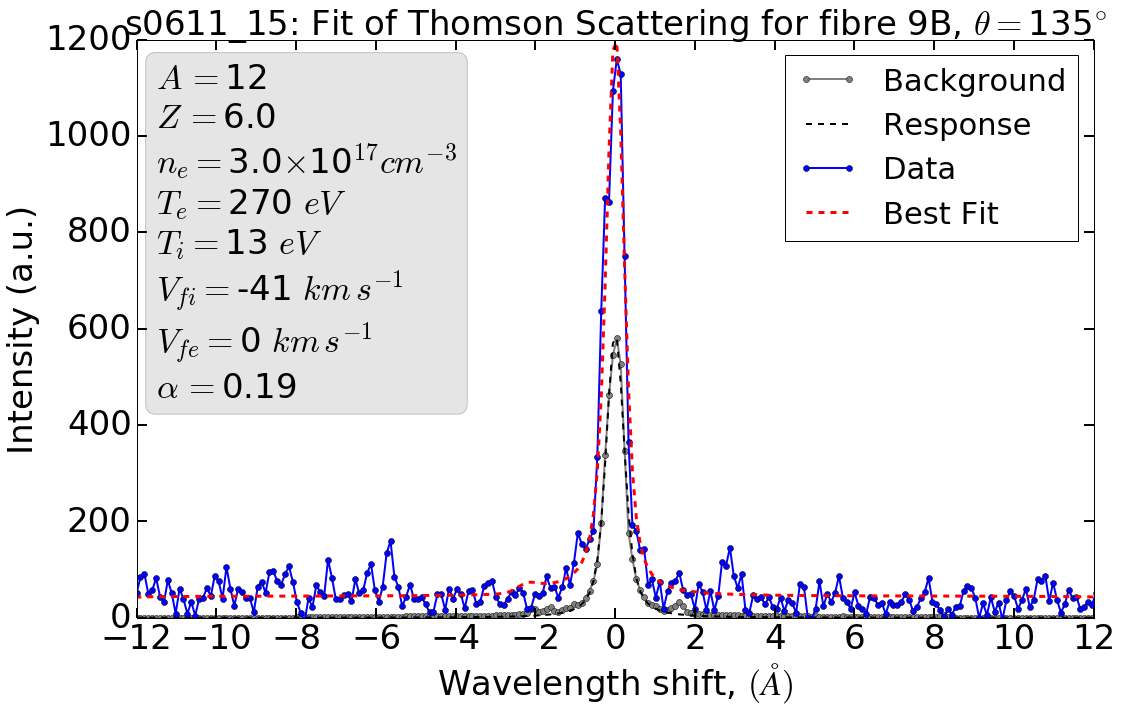

In [10]:
'''
Specify the plasma parameters in the form (V
alues, Minimum, Independent)
If Independent is True, then the value is fixed and minimum has no meaning
If Independent is False, then the value is an initial guess for the fit
and minimum is either a float, or None to specify no given minimum
For multi-species fits, Aj, Zj and Fj only can have their value as a tuple (A1,A2...Aj)
Even for a single-species fit, enclose A, Z and F in (), eg. 'Aj':((12), True, None)
'''
'''Choose the fibre to fit'''
Fnum=9
Fset='B'
n_e=3e17

f=ts.select_fibre(Fnum,Fset)

plasma_parameters={ 'model': 'nLTE',
                    'n_e': (n_e,True),#in cm^-3, must be specified
                    'T_e': (100, False),#In electron volts. 
                    'V_fe':(0, True),#m/s.
                    'A':  ((12,), True),#in nucleon masses, must be specified
                    'T_i': (100, False),#In electron volts.
                    'V_fi':(0, False),#m/s.
                    'stry':(100, False), #Fraction of signal made up of stray light. >0, <1.0!!
                    'amp': (1000, False), #Fraction of signal made up of spectrum.
                    'offset': (120, False), #
                    'shift': (0, True)
                    }

'''This code fits and plots the result'''
f.voigt_response()
f.fit_fibre(plasma_parameters)
ts.pretty_plot(Fnum,Fset, tm=1.7, sr=12)
print(f.skw_res.fit_report())

In [5]:
ts.fig.savefig('Figures/s0611_15 fibre 8A largetext.pdf')

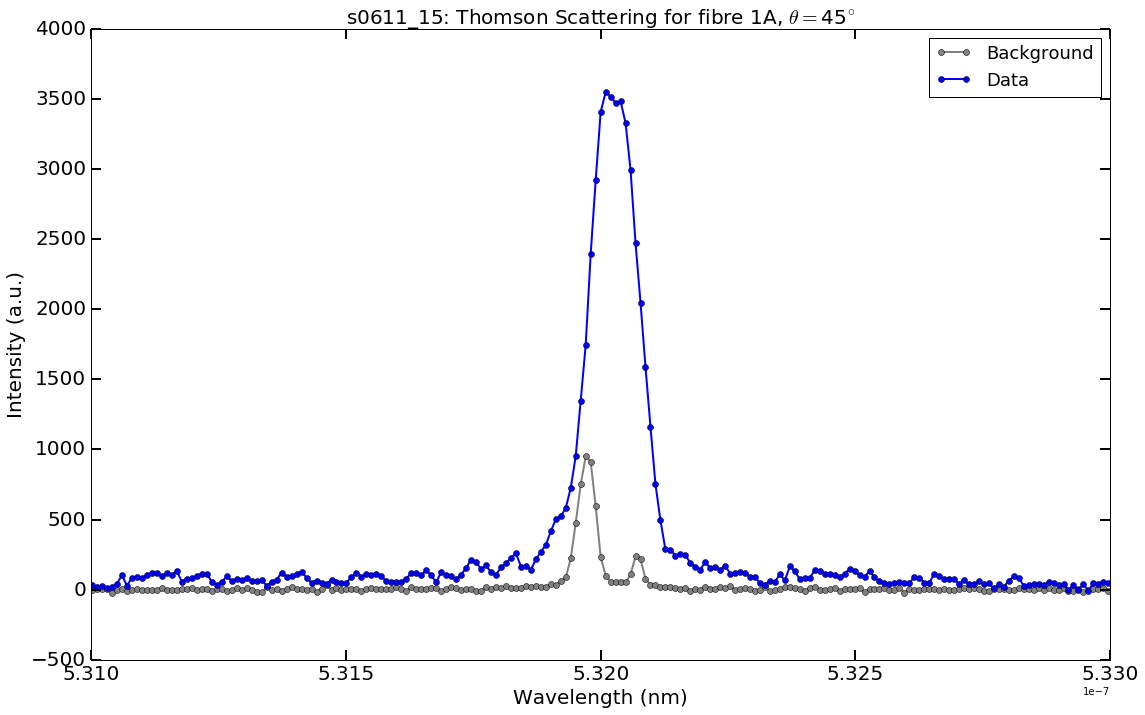

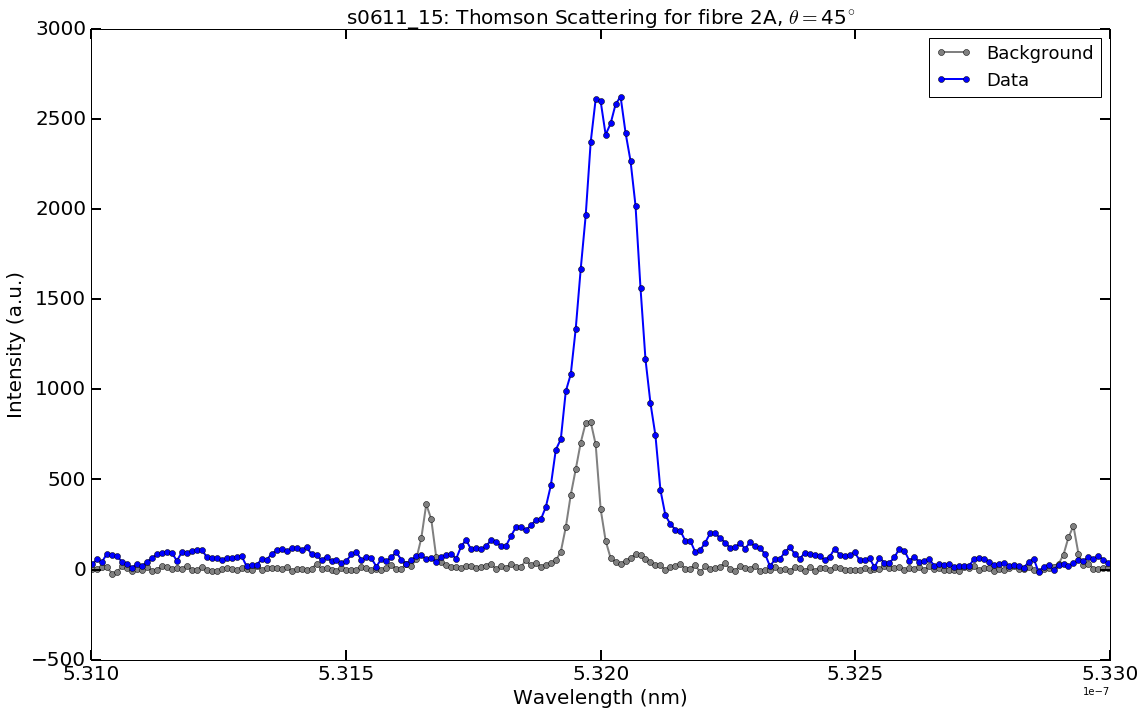

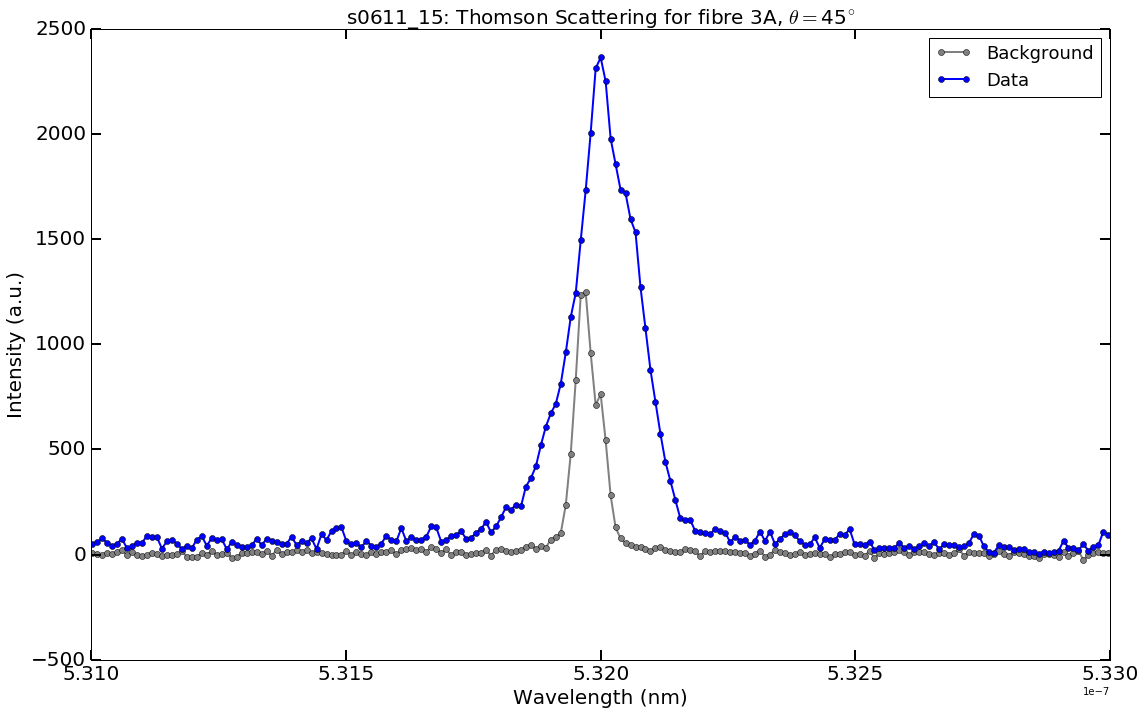

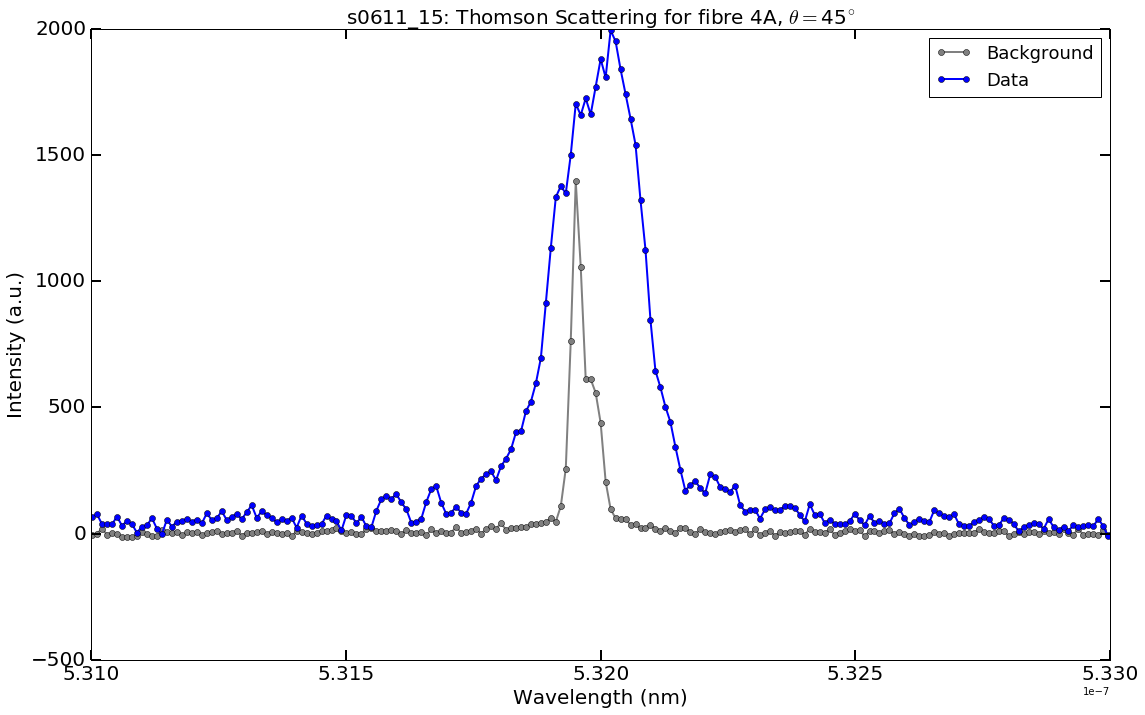

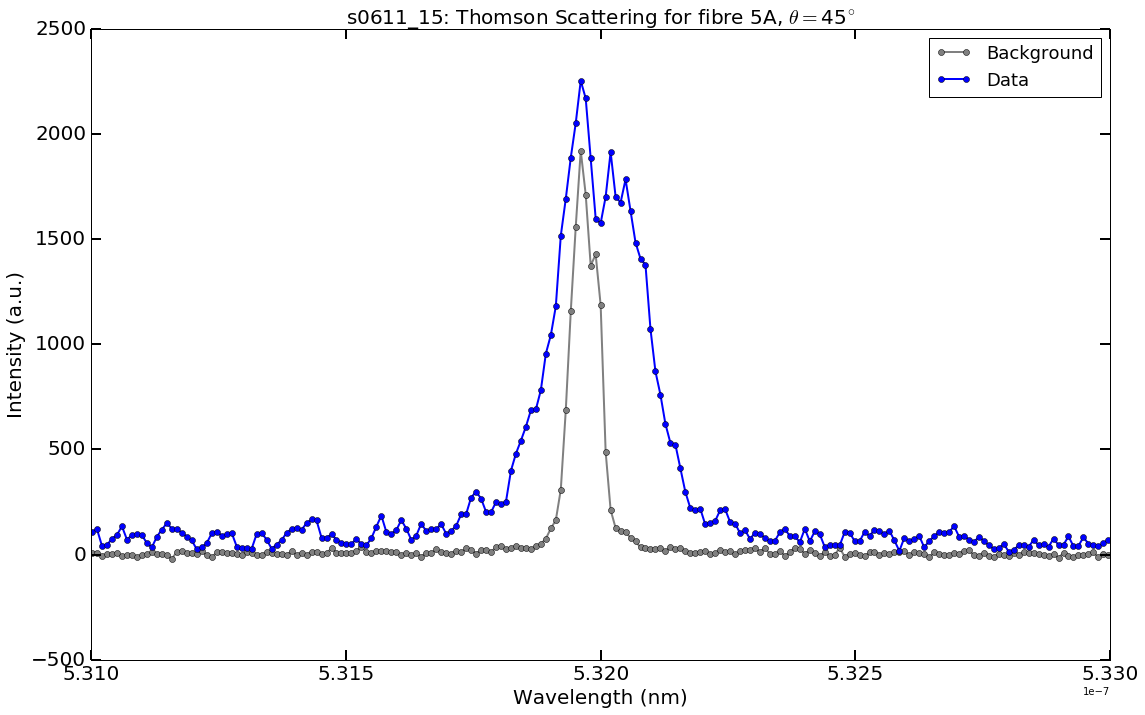

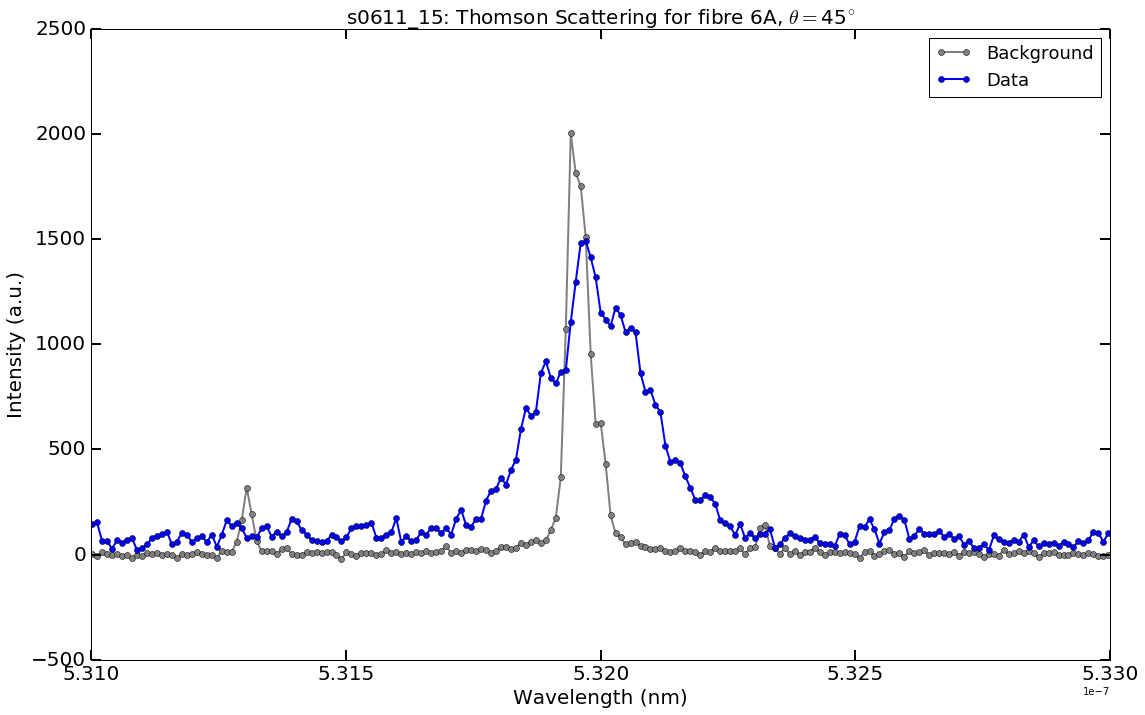

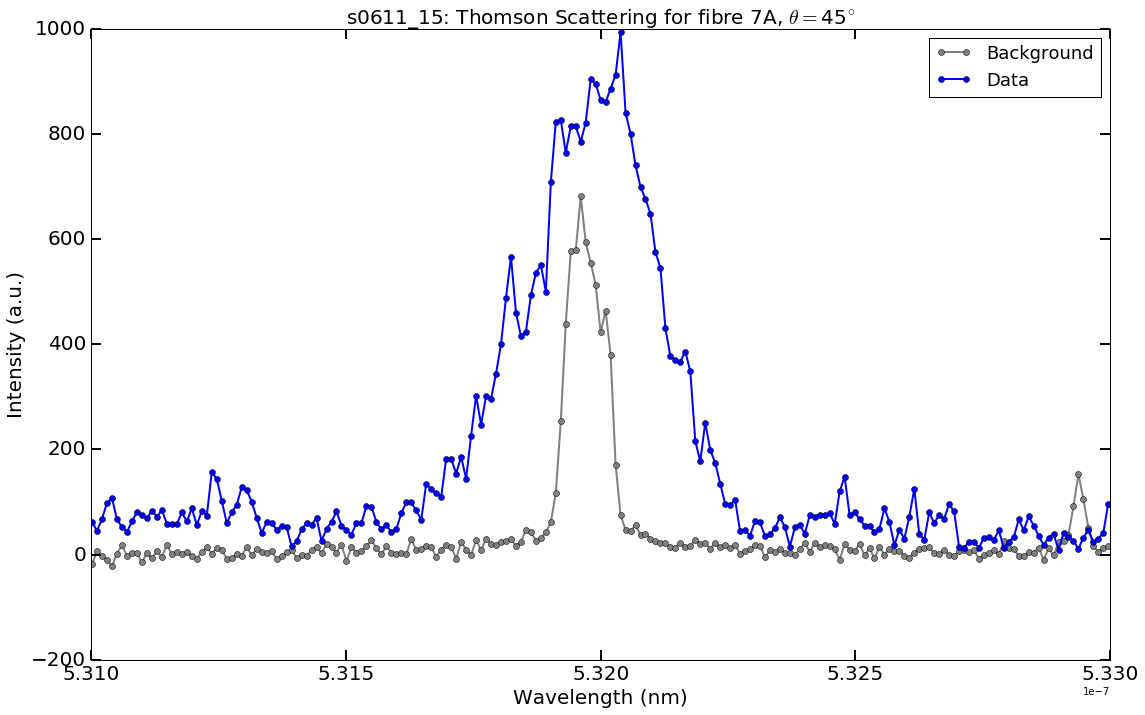

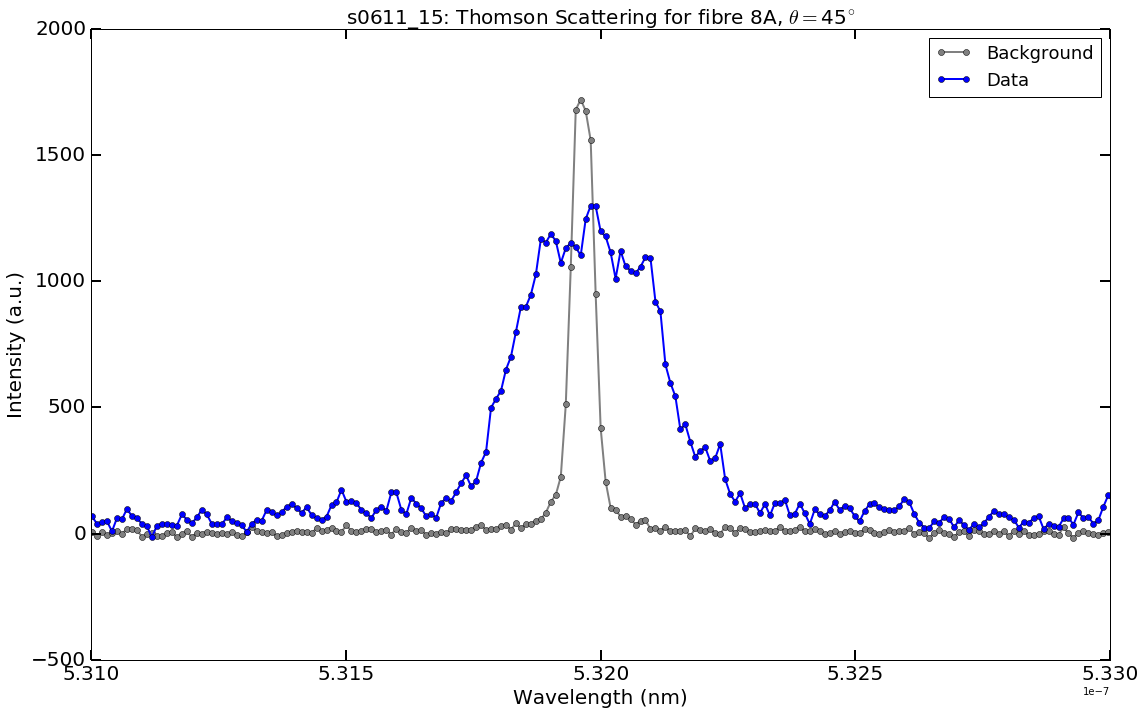

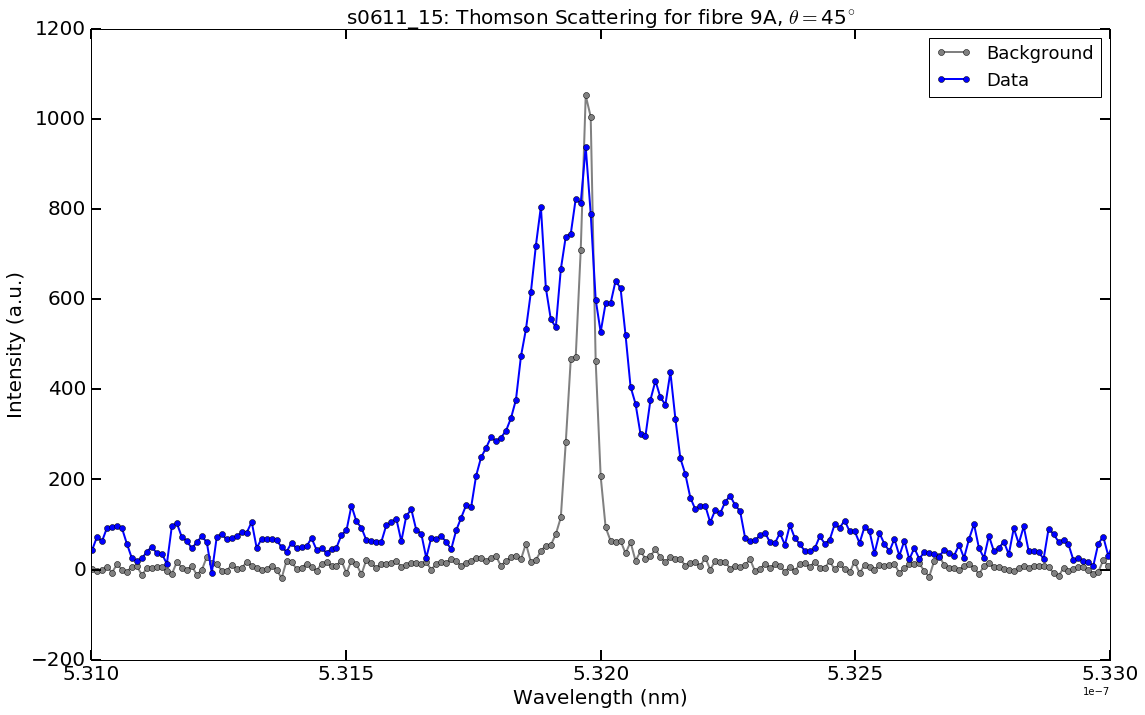

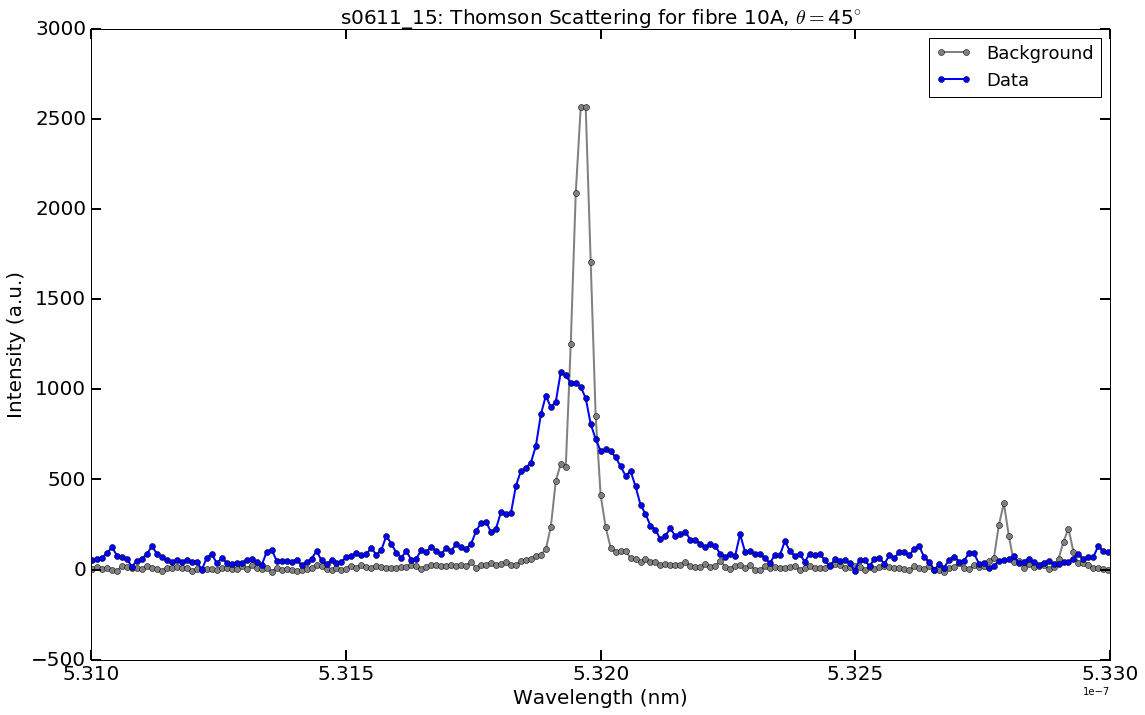

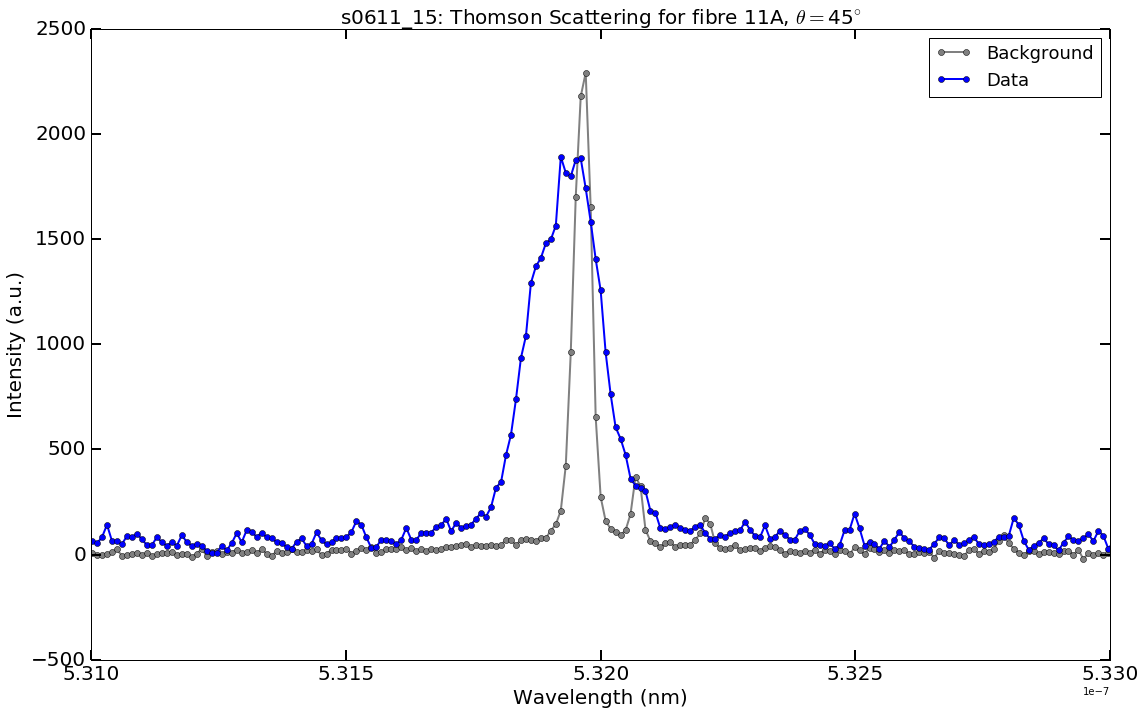

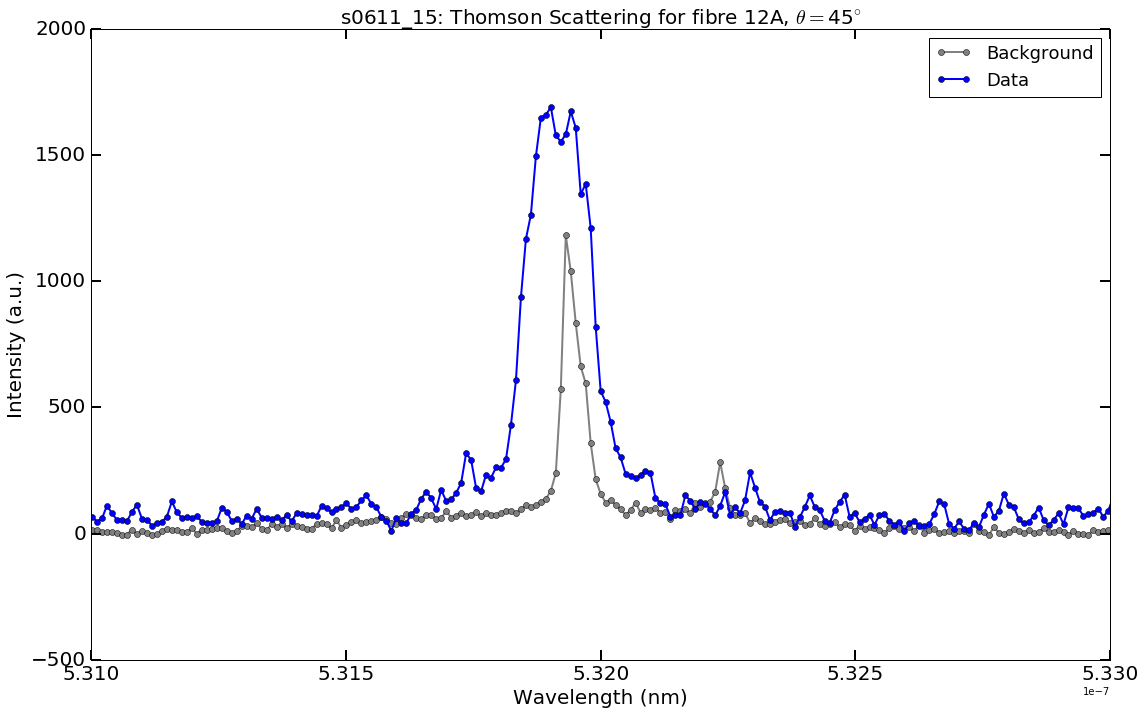

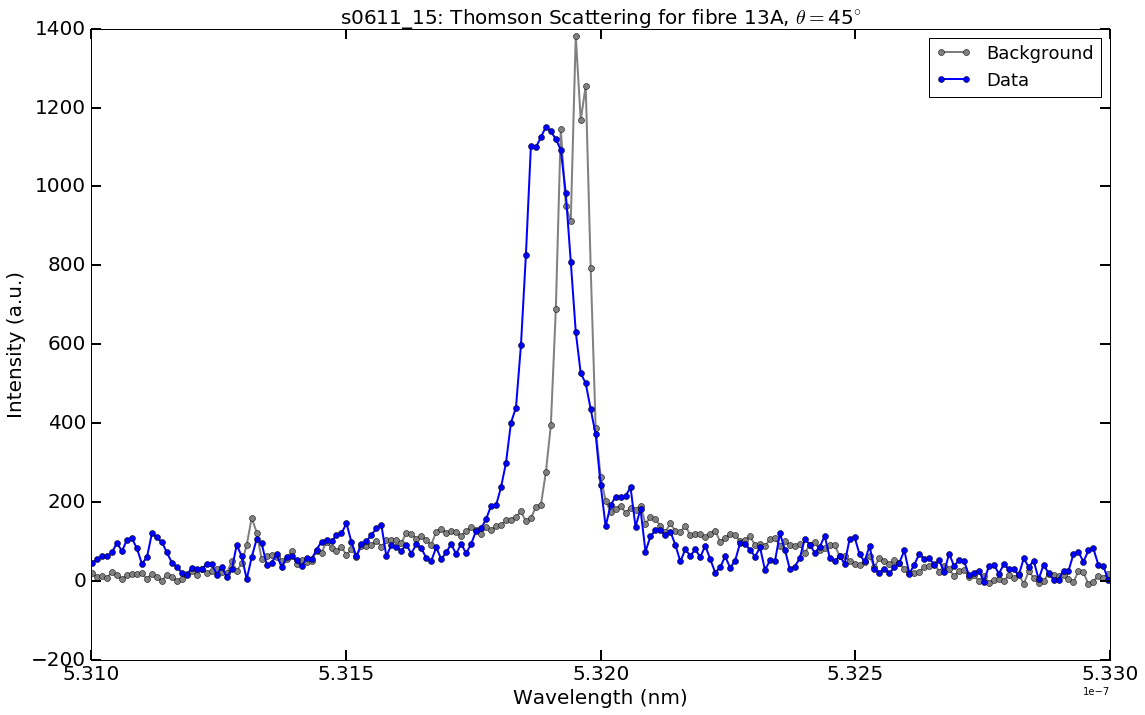

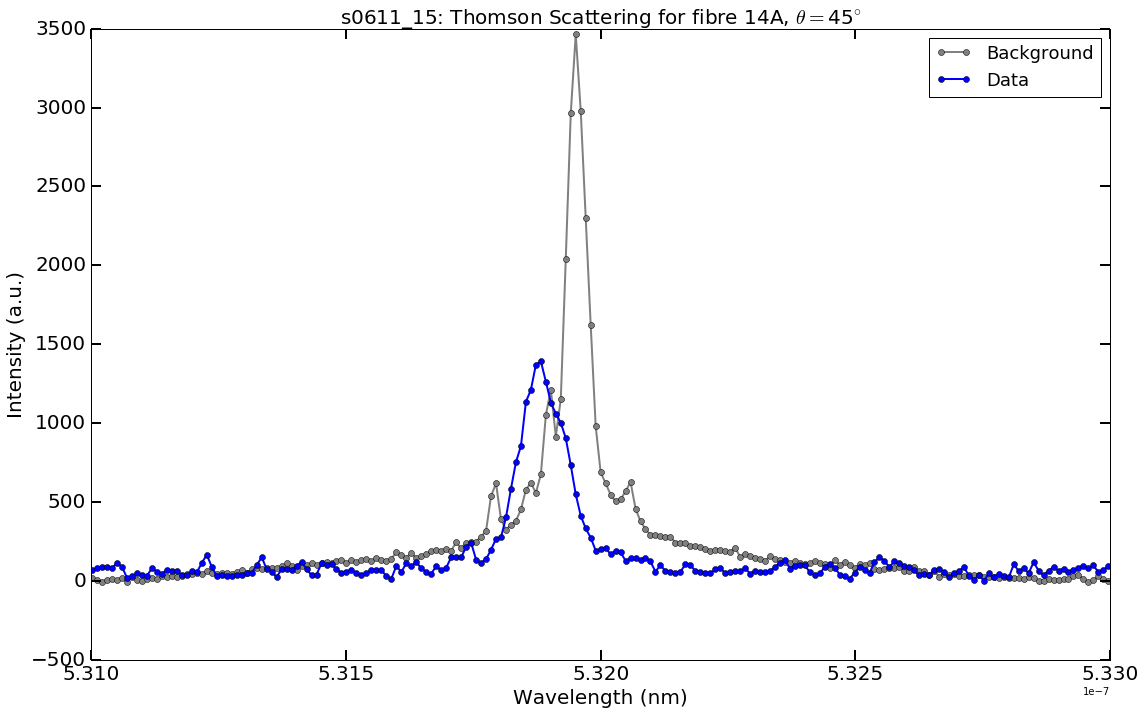

In [5]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='A')

In [23]:
p=Plasma(A=12,Z=4,n_e=2e17,T_e=20,T_i=48,B=3, V=26e5,L=1.0)
p.print_dim_params()
print p.rho_e, p.mfp_e

Ion magnetisation = 0.029
Electron magnetisation = 3.3
Thermal Beta = 0.14
Kinetic Beta = 0.047
Magnetic Reynolds Number = 11.0
Lundquist number = 37.0
Haines number = 0.013
0.000354891091883 0.00116328893165


AttributeError: Fibre instance has no attribute 'shift'

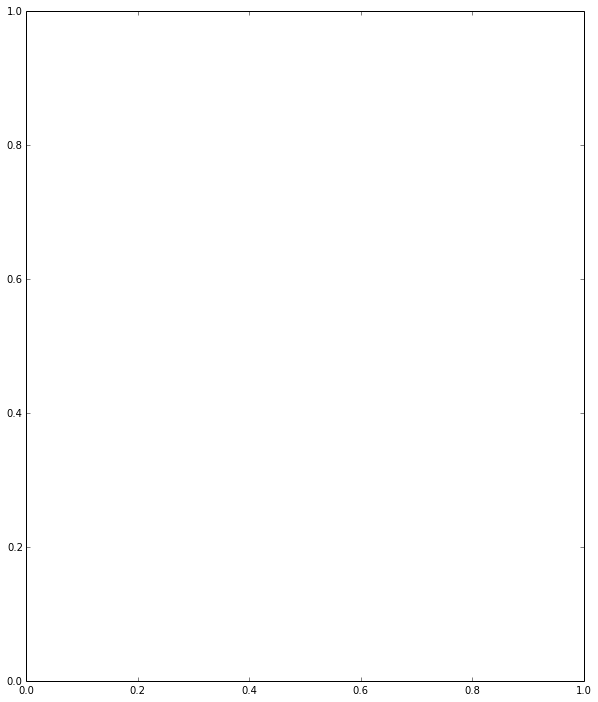

In [6]:
import matplotlib.pyplot as plt
Fnum=8
Fset='B'
sr=4 
f=ts.select_fibre(Fnum,Fset)
text_mul=2.8
fig, ax=plt.subplots(figsize=(10,12))
plot_data=ax.plot(f.shift*1e10,f.shot,label='Data', marker='o',lw=4, c='b')
plot_bkgd=ax.plot(f.shift*1e10,0.5*f.bkgd, label='Background', lw=3, marker='o', c='0.5')

#plotting region
ax.set_ylim([0.0,1.1])
ax.set_xlim([-sr,sr])
ax.set_xticks(np.arange(-sr,sr+1,2))
ax.set_yticks(np.arange(0,1.1,0.2))
ax.set_xlabel(r'Wavelength Shift $(\AA)$',fontsize=20*text_mul)
ax.set_ylabel('Intensity (a.u.)',fontsize=20*text_mul)
ax.tick_params(labelsize=20*text_mul, pad=5, length=10, width=2)
#ax.legend(fontsize=18*text_mul)

plt.tight_layout()
fig.savefig('s0611_15 8A data narrow.png')

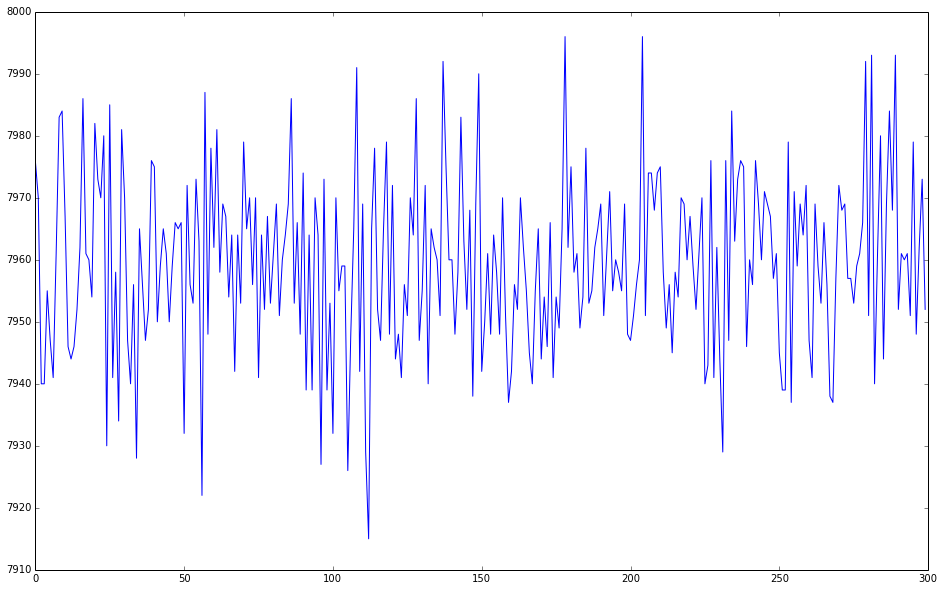

In [104]:
f=ts.shot_fibres[15]
zero=np.mean(f[0:300])
fz=f-zero
fn=fz/fz.max()
fig,ax=plt.subplots(figsize=(16,10))
plot=ax.plot(f[-300:], markersize=5)
#ax.set_xlim([520,534])
#ax.set_ylim([-0.05,1.1])
#plot2=ax.plot(ts.bkgd_fibres[7,0:1200])

In [77]:
ts.shot[8]

array([ 613.,  616.,  609., ...,  613.,  608.,  614.])

In [5]:
ts.x_axis.size

300